## Milestone II: Advanced Models

Based on Milestone I results, we now implement two advanced classifiers to improve performance — particularly Recall, which is critical in medical diagnosis.

**Model Choices:**

1. **Random Forest Classifier** — An ensemble method using bagging over multiple decision trees. It reduces variance compared to a single tree, handles feature interactions naturally, and provides built-in feature importance rankings (useful for Milestone III).

2. **Support Vector Machine (SVM with RBF Kernel)** — A powerful kernel-based classifier that maps data into higher-dimensional space to find optimal decision boundaries. It excels on small-to-medium datasets with many features, and benefits directly from our existing StandardScaler pipeline.

Both models are trained with **default hyperparameters** — no tuning is performed in this milestone. Hyperparameter optimization is reserved for Milestone III.

In [ ]:
# 8. Advanced Model 1: Random Forest Classifier (Default Hyperparameters)
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

rf_results = cross_validate(
    rf_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=True
)

print("Random Forest Results")
print("CV Accuracy:", rf_results['test_accuracy'].mean())
print("CV Precision:", rf_results['test_precision'].mean())
print("CV Recall:", rf_results['test_recall'].mean())
print("CV ROC-AUC:", rf_results['test_roc_auc'].mean())
print("CV F1 SCORE:", rf_results['test_f1'].mean())
print("Fit Time:", rf_results['fit_time'].mean())
print("Score Time:", rf_results['score_time'].mean())

Random Forest Results
CV Accuracy: 0.964835164835165
CV Precision: 0.9640949238933111
CV Recall: 0.9411764705882353
CV ROC-AUC: 0.9889060887512899
CV F1 SCORE: 0.9519447457150247
Fit Time: 0.36402416229248047
Score Time: 0.05972967147827148


In [ ]:
# 8. Advanced Model 2: Support Vector Machine (RBF Kernel, Default Hyperparameters)
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])

svm_results = cross_validate(
    svm_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=True
)

print("SVM (RBF) Results")
print("CV Accuracy:", svm_results['test_accuracy'].mean())
print("CV Precision:", svm_results['test_precision'].mean())
print("CV Recall:", svm_results['test_recall'].mean())
print("CV ROC-AUC:", svm_results['test_roc_auc'].mean())
print("CV F1 SCORE:", svm_results['test_f1'].mean())
print("Fit Time:", svm_results['fit_time'].mean())
print("Score Time:", svm_results['score_time'].mean())

SVM (RBF) Results
CV Accuracy: 0.9714285714285713
CV Precision: 0.9769459298871064
CV Recall: 0.9470588235294116
CV ROC-AUC: 0.9949432404540763
CV F1 SCORE: 0.9609865990024022
Fit Time: 0.0409492015838623
Score Time: 0.027421283721923827


### 9. Performance Evaluation — Advanced Models (ROC, Confusion Matrix, PR Curve)

We now evaluate the advanced models using the same methodology as Milestone I: ROC curves, Confusion Matrices, and Precision-Recall curves — all generated from 5-Fold Stratified Cross-Validation predictions.

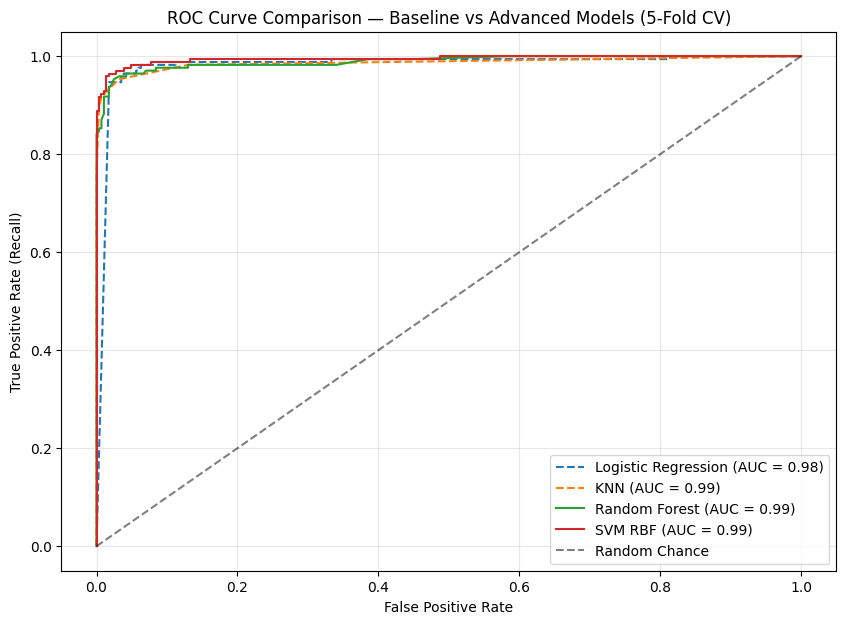

In [ ]:
# Generate cross-validated probability predictions for advanced models
rf_cv_probs = cross_val_predict(rf_pipeline, X_train, y_train,
                                cv=cv_strategy, method='predict_proba')[:, 1]
svm_cv_probs = cross_val_predict(svm_pipeline, X_train, y_train,
                                 cv=cv_strategy, method='predict_proba')[:, 1]

# Calculate ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_train, rf_cv_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_train, svm_cv_probs)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot all 4 models together
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linestyle='--')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM RBF (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Chance')
plt.title('ROC Curve Comparison — Baseline vs Advanced Models (5-Fold CV)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

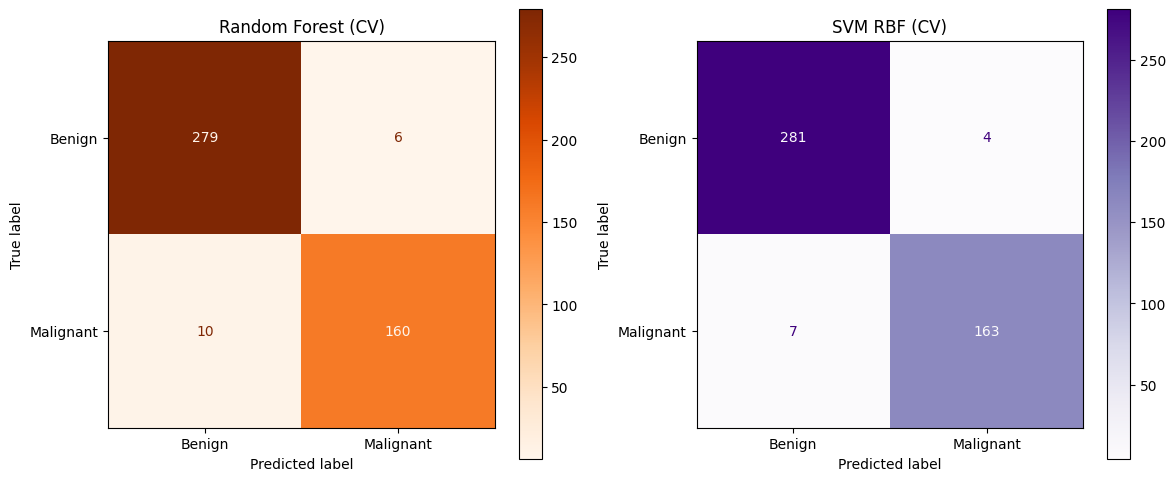

In [ ]:
# Generate hard predictions at threshold 0.5
rf_cv_preds = (rf_cv_probs > 0.5).astype(int)
svm_cv_preds = (svm_cv_probs > 0.5).astype(int)

labels = ['Benign', 'Malignant']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(
    confusion_matrix(y_train, rf_cv_preds),
    display_labels=labels
).plot(ax=ax[0], cmap='Oranges')
ax[0].set_title("Random Forest (CV)")

ConfusionMatrixDisplay(
    confusion_matrix(y_train, svm_cv_preds),
    display_labels=labels
).plot(ax=ax[1], cmap='Purples')
ax[1].set_title("SVM RBF (CV)")

plt.tight_layout()
plt.show()

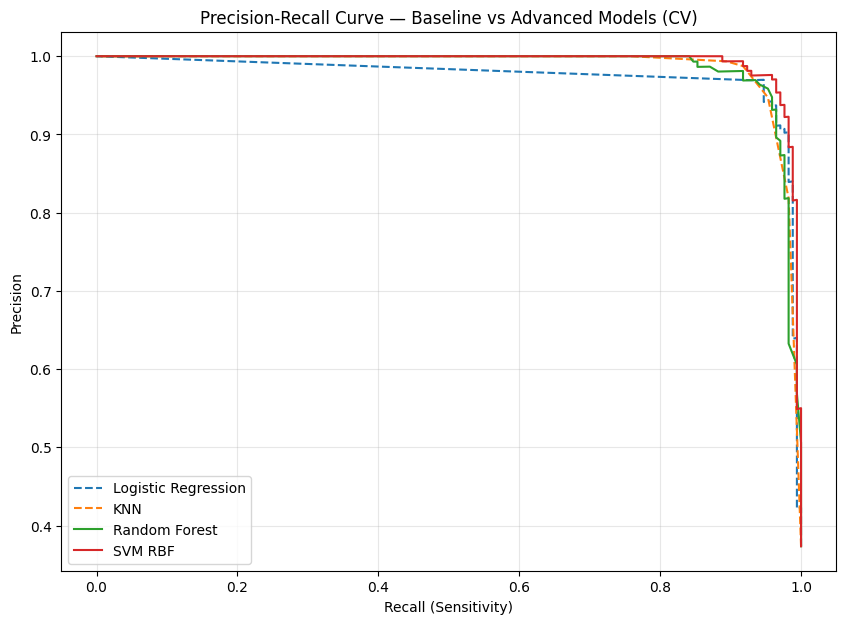

In [ ]:
# PR curves for advanced models
precision_rf, recall_rf, _ = precision_recall_curve(y_train, rf_cv_probs)
precision_svm, recall_svm, _ = precision_recall_curve(y_train, svm_cv_probs)

plt.figure(figsize=(10, 7))
plt.plot(recall_log, precision_log, label='Logistic Regression', linestyle='--')
plt.plot(recall_knn, precision_knn, label='KNN', linestyle='--')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_svm, precision_svm, label='SVM RBF')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve — Baseline vs Advanced Models (CV)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Resource Utilization — Advanced Models

We measure training time, per-sample inference speed, and serialized model size for the advanced models using the same methodology as Milestone I.

In [ ]:
# Fit models for resource measurement
rf_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

# Speed benchmarking
rf_train_time = measure_time(lambda: rf_pipeline.fit(X_train, y_train))
rf_pred_time = measure_time(lambda: rf_pipeline.predict(X_test))

svm_train_time = measure_time(lambda: svm_pipeline.fit(X_train, y_train))
svm_pred_time = measure_time(lambda: svm_pipeline.predict(X_test))

print("=== SPEED COMPARISON (Advanced Models) ===")
print("Random Forest Train Time:", rf_train_time)
print("Random Forest Predict Time:", rf_pred_time/len(X_test), "per sample")
print("SVM Train Time:", svm_train_time)
print("SVM Predict Time:", svm_pred_time/len(X_test), "per sample")

# Memory benchmarking
joblib.dump(rf_pipeline, 'rf_model.pkl')
joblib.dump(svm_pipeline, 'svm_model.pkl')

rf_size = os.path.getsize('rf_model.pkl') / 1024
svm_size = os.path.getsize('svm_model.pkl') / 1024

print("\n=== MEMORY USAGE (Advanced Models) ===")
print("Random Forest model size: %.2f KB" % rf_size)
print("SVM model size: %.2f KB" % svm_size)

=== SPEED COMPARISON (Advanced Models) ===
Random Forest Train Time: 0.7318108320236206
Random Forest Predict Time: 0.00019414592207523814 per sample
SVM Train Time: 0.06813628673553467
SVM Predict Time: 9.13297920896296e-05 per sample

=== MEMORY USAGE (Advanced Models) ===
Random Forest model size: 320.49 KB
SVM model size: 30.65 KB


In [ ]:
# Summary comparison table of all 4 models
import pandas as pd

summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'SVM (RBF)'],
    'CV Accuracy': [
        logistic_results['test_accuracy'].mean(),
        knn_results['test_accuracy'].mean(),
        rf_results['test_accuracy'].mean(),
        svm_results['test_accuracy'].mean()
    ],
    'CV Precision': [
        logistic_results['test_precision'].mean(),
        knn_results['test_precision'].mean(),
        rf_results['test_precision'].mean(),
        svm_results['test_precision'].mean()
    ],
    'CV Recall': [
        logistic_results['test_recall'].mean(),
        knn_results['test_recall'].mean(),
        rf_results['test_recall'].mean(),
        svm_results['test_recall'].mean()
    ],
    'CV F1': [
        logistic_results['test_f1'].mean(),
        knn_results['test_f1'].mean(),
        rf_results['test_f1'].mean(),
        svm_results['test_f1'].mean()
    ],
    'CV ROC-AUC': [
        logistic_results['test_roc_auc'].mean(),
        knn_results['test_roc_auc'].mean(),
        rf_results['test_roc_auc'].mean(),
        svm_results['test_roc_auc'].mean()
    ],
    'Train Time (s)': [log_train_time, knn_train_time, rf_train_time, svm_train_time],
    'Pred Time/Sample (s)': [
        log_pred_time/len(X_test),
        knn_pred_time/len(X_test),
        rf_pred_time/len(X_test),
        svm_pred_time/len(X_test)
    ],
    'Model Size (KB)': [log_size, knn_size, rf_size, svm_size]
})

display(summary.round(4))

,Model,CV Accuracy,CV Precision,CV Recall,CV F1,CV ROC-AUC,Train Time (s),Pred Time/Sample (s),Model Size (KB)
0,Logistic Regression,0.9604,0.9485,0.9471,0.9472,0.9933,0.0135,0.0000,2.9697
1,KNN,0.9648,0.9875,0.9176,0.9510,0.9871,0.0045,0.0000,112.8887
2,Random Forest,0.9648,0.9641,0.9412,0.9519,0.9889,0.7318,0.0002,320.4863
3,SVM (RBF),0.9714,0.9769,0.9471,0.9610,0.9949,0.0681,0.0001,30.6533


### Milestone II Conclusion

**Performance Analysis:**
- **SVM (RBF) is the best-performing model** with the highest CV Accuracy (97.14%), F1-Score (0.961), and ROC-AUC (0.9949).
- Critically, SVM produced only **7 False Negatives** — the fewest missed cancer cases across all four models. This is a significant improvement over KNN's 14 FN from Milestone I.
- The ROC curves confirm all models perform well above random chance (AUC ≥ 0.98), but SVM and Random Forest hug the top-left corner most tightly.
- The PR curve shows SVM and Random Forest maintain near-perfect precision at high recall levels, outperforming both baselines.

**Resource Analysis:**
- **Random Forest** is the most expensive model: slowest training (0.73s), slowest inference (0.00019s/sample), and largest memory footprint (320.49 KB) due to storing 100 decision trees.
- **SVM (RBF)** offers an excellent balance — moderate training time (0.068s), fast inference (0.00009s/sample), and compact size (30.65 KB). It stores only support vectors rather than the full dataset.
- **Logistic Regression** remains the most lightweight model (2.97 KB, fastest inference), confirming its suitability for resource-constrained deployment.

**Model Selection for Milestone III:**
- Based on the combined analysis of performance metrics (especially Recall and False Negatives) and resource efficiency, **SVM (RBF)** is selected as the best model for hyperparameter tuning in Milestone III.
- Random Forest will also be considered for feature importance analysis, as it provides built-in feature rankings useful for feature engineering.

**Next Steps:** In Milestone III, we will apply feature engineering techniques and hyperparameter tuning to SVM (RBF) to further reduce False Negatives and improve overall classification performance. The final evaluation will be conducted on the held-out test set.